In [1]:
low = ["mt","br","rm-sursilv","sl","sah","lv","cv","ga-IE","ka","cnh","ha","rm-vallader","vi","as","gn","ab","or"]
medium = ["eu","nl","pt","tt","cs","uk","et","tr","mn","ky","ar","fy-NL","sv-SE","id","el","ro","ia","sl","zh-CN","dv"]
high = ["de","fr","ca",'es',"ru","it","po","fa","eo","cy","ta"]
higher = ["en","rw"]

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from pathlib import Path
import collections
from collections import Counter
from tqdm import tqdm
# import plotly.express as px
base = Path("/mnt/disks/std750")
data = pd.read_csv(base / "data" / "csvs" / "new4.csv")
main_data = pd.read_csv(base / "data" / "csvs" / "new3.csv")
main_data = main_data[main_data["counts"] >= 5]

In [3]:
iso_code_to_name = {'ab':'Abkhaz',
'ar':'Arabic',
'as':'Assamese',
'br':'Breton',
'cnh':'Hakha Chin',
'ca':'Catalan',
'cs':'Czech',
'cv':'Chuvash',
'cy':'Welsh',
'de':'German',
'dv':'Divehi',
'el':'Greek',
'en':'English',
'es':'Spanish',
'eo':'Esperanto',
'eu':'Basque',
'et':'Estonian',
'fa':'Persian',
'fr':'French',
'fy-NL':'Frisian',
'ga-IE':'Irish',
'ia':'Interlingua',
'id':'Indonesian',
'it':'Italian',
'ja':'Japanese',
'ka':'Georgian',
'ky':'Kyrgyz',
'lv':'Latvian',
'mn':'Mongolian',
'mt':'Maltese',
'nl':'Dutch',
'or':'Oriya',
'pa-IN':'Punjabi',
'pl':'Polish',
'pt':'Portuguese',
'rm-sursilv':'Sursilvan',
'rm-vallader':'Vallader',
'ro':'Romanian',
'ru':'Russian',
'rw':'Kinyarwanda',
'sah':'Sakha',
'sl':'Slovenian',
'sv-SE':'Swedish',
'ta':'Tamil',
'tr':'Turkish',
'tt':'Tatar',
'uk':'Ukrainian',
'vi':'Vietnamese',
'zh-CN':'Chinese'}

In [4]:
languages = main_data['language'].unique()
main_data['wl'] = main_data['word'].str.len()
wordlengths_counts = dict(main_data[['counts','wl']].groupby('wl').sum().reset_index().values.tolist())
language_fractions = {}
for l in tqdm(languages):
language_fractions[l] = dict(main_data[main_data['language']==l].groupby('wl')['counts'].sum().reset_index().values)
for l in tqdm(language_fractions):
for j in wordlengths_counts:
if j not in language_fractions[l]:
language_fractions[l][j] = 0
language_fractions_df = pd.DataFrame(language_fractions)
language_fractions_df = language_fractions_df.rename(iso_code_to_name, axis=1)

100%|██████████| 48/48 [00:00<00:00, 116575.91it/s]


In [5]:
language_fractions_df

,Italian,Maltese,Polish,Slovenian,Georgian,Sursilvan,Vallader,Mongolian,Romanian,Spanish,...,Portuguese,Tamil,Persian,English,Breton,Chuvash,Catalan,Tatar,Turkish,Russian
3.0,98098.0,5383.0,93486.0,2561.0,673.0,6234.0,1731.0,9198.0,2124.0,245760.0,...,46686.0,174.0,342686.0,1388735.0,6056.0,1497.0,558947.0,19437.0,12494.0,55168.0
4.0,60035.0,7849.0,64831.0,2703.0,763.0,3866.0,922.0,7453.0,4252.0,149234.0,...,40565.0,758.0,374783.0,1647976.0,5324.0,1355.0,300366.0,22853.0,11760.0,44716.0
5.0,107270.0,4599.0,74697.0,2708.0,656.0,2504.0,573.0,9803.0,2639.0,193815.0,...,39645.0,536.0,249590.0,1145729.0,3525.0,2150.0,317731.0,29017.0,16137.0,67622.0
6.0,81082.0,3424.0,67352.0,1422.0,621.0,2131.0,477.0,9278.0,2697.0,163536.0,...,28267.0,209.0,122726.0,872236.0,2639.0,829.0,298827.0,15707.0,11444.0,64864.0
7.0,65570.0,2205.0,52483.0,658.0,737.0,1102.0,243.0,3461.0,2081.0,158812.0,...,21638.0,175.0,56283.0,741493.0,1607.0,659.0,255145.0,10250.0,9248.0,55053.0
8.0,54892.0,1810.0,43169.0,314.0,445.0,658.0,88.0,2337.0,1100.0,118989.0,...,15118.0,59.0,27342.0,511727.0,761.0,545.0,213997.0,6141.0,5971.0,49666.0
9.0,34074.0,670.0,31409.0,182.0,241.0,401.0,69.0,1143.0,764.0,88250.0,...,7030.0,27.0,9520.0,339622.0,233.0,258.0,171156.0,2280.0,4850.0,43873.0
10.0,26622.0,453.0,18960.0,53.0,286.0,253.0,27.0,304.0,337.0,60122.0,...,4655.0,40.0,3450.0,204458.0,171.0,213.0,107368.0,1019.0,2861.0,32573.0
11.0,16161.0,180.0,11082.0,19.0,209.0,143.0,10.0,193.0,80.0,36264.0,...,2499.0,5.0,1665.0,103044.0,27.0,80.0,63211.0,405.0,1187.0,29620.0
12.0,7548.0,123.0,6449.0,0.0,95.0,96.0,13.0,96.0,27.0,17623.0,...,1167.0,0.0,1144.0,56223.0,21.0,26.0,38509.0,170.0,925.0,22595.0


In [6]:
language_fractions_df = pd.DataFrame(language_fractions)

In [7]:
language_fractions_df

,it,mt,pl,sl,ka,rm-sursilv,rm-vallader,mn,ro,es,...,pt,ta,fa,en,br,cv,ca,tt,tr,ru
3.0,98098.0,5383.0,93486.0,2561.0,673.0,6234.0,1731.0,9198.0,2124.0,245760.0,...,46686.0,174.0,342686.0,1388735.0,6056.0,1497.0,558947.0,19437.0,12494.0,55168.0
4.0,60035.0,7849.0,64831.0,2703.0,763.0,3866.0,922.0,7453.0,4252.0,149234.0,...,40565.0,758.0,374783.0,1647976.0,5324.0,1355.0,300366.0,22853.0,11760.0,44716.0
5.0,107270.0,4599.0,74697.0,2708.0,656.0,2504.0,573.0,9803.0,2639.0,193815.0,...,39645.0,536.0,249590.0,1145729.0,3525.0,2150.0,317731.0,29017.0,16137.0,67622.0
6.0,81082.0,3424.0,67352.0,1422.0,621.0,2131.0,477.0,9278.0,2697.0,163536.0,...,28267.0,209.0,122726.0,872236.0,2639.0,829.0,298827.0,15707.0,11444.0,64864.0
7.0,65570.0,2205.0,52483.0,658.0,737.0,1102.0,243.0,3461.0,2081.0,158812.0,...,21638.0,175.0,56283.0,741493.0,1607.0,659.0,255145.0,10250.0,9248.0,55053.0
8.0,54892.0,1810.0,43169.0,314.0,445.0,658.0,88.0,2337.0,1100.0,118989.0,...,15118.0,59.0,27342.0,511727.0,761.0,545.0,213997.0,6141.0,5971.0,49666.0
9.0,34074.0,670.0,31409.0,182.0,241.0,401.0,69.0,1143.0,764.0,88250.0,...,7030.0,27.0,9520.0,339622.0,233.0,258.0,171156.0,2280.0,4850.0,43873.0
10.0,26622.0,453.0,18960.0,53.0,286.0,253.0,27.0,304.0,337.0,60122.0,...,4655.0,40.0,3450.0,204458.0,171.0,213.0,107368.0,1019.0,2861.0,32573.0
11.0,16161.0,180.0,11082.0,19.0,209.0,143.0,10.0,193.0,80.0,36264.0,...,2499.0,5.0,1665.0,103044.0,27.0,80.0,63211.0,405.0,1187.0,29620.0
12.0,7548.0,123.0,6449.0,0.0,95.0,96.0,13.0,96.0,27.0,17623.0,...,1167.0,0.0,1144.0,56223.0,21.0,26.0,38509.0,170.0,925.0,22595.0


In [8]:
language_fractions_df.columns

Index(['it', 'mt', 'pl', 'sl', 'ka', 'rm-sursilv', 'rm-vallader', 'mn', 'ro',
       'es', 'eo', 'sah', 'lv', 'fr', 'eu', 'cnh', 'pa-IN', 'dv', 'ar', 'vi',
       'as', 'cy', 'ab', 'or', 'cs', 'fy-NL', 'sv-SE', 'id', 'ky', 'ia', 'et',
       'el', 'ga-IE', 'ja', 'nl', 'de', 'uk', 'rw', 'pt', 'ta', 'fa', 'en',
       'br', 'cv', 'ca', 'tt', 'tr', 'ru'],
      dtype='object')

In [9]:
language_fractions_df[low]

KeyError: "['ha', 'gn'] not in index"

In [10]:
low = [i for i in low if i not in ["ha","gn"]]

In [11]:
language_fractions_df[low]

,mt,br,rm-sursilv,sl,sah,lv,cv,ga-IE,ka,cnh,rm-vallader,vi,as,ab,or
3.0,5383.0,6056.0,6234.0,2561.0,1629.0,4859.0,1497.0,2245.0,673.0,4100.0,1731.0,262.0,211.0,0.0,181.0
4.0,7849.0,5324.0,3866.0,2703.0,2972.0,4476.0,1355.0,3065.0,763.0,2220.0,922.0,67.0,41.0,0.0,6.0
5.0,4599.0,3525.0,2504.0,2708.0,2469.0,2884.0,2150.0,2177.0,656.0,837.0,573.0,51.0,35.0,7.0,47.0
6.0,3424.0,2639.0,2131.0,1422.0,2370.0,1434.0,829.0,1784.0,621.0,421.0,477.0,6.0,10.0,0.0,0.0
7.0,2205.0,1607.0,1102.0,658.0,1220.0,878.0,659.0,889.0,737.0,170.0,243.0,0.0,9.0,5.0,0.0
8.0,1810.0,761.0,658.0,314.0,740.0,390.0,545.0,493.0,445.0,186.0,88.0,0.0,0.0,0.0,0.0
9.0,670.0,233.0,401.0,182.0,418.0,245.0,258.0,308.0,241.0,19.0,69.0,0.0,0.0,0.0,0.0
10.0,453.0,171.0,253.0,53.0,97.0,57.0,213.0,257.0,286.0,5.0,27.0,0.0,0.0,0.0,6.0
11.0,180.0,27.0,143.0,19.0,86.0,25.0,80.0,57.0,209.0,0.0,10.0,0.0,0.0,0.0,0.0
12.0,123.0,21.0,96.0,0.0,13.0,5.0,26.0,34.0,95.0,5.0,13.0,0.0,0.0,0.0,0.0


In [12]:
language_fractions_df[low].shape

(31, 15)

In [13]:
language_fractions_df[medium].shape

KeyError: "['zh-CN'] not in index"

In [14]:
medium = [i for i in medium if i is not 'zh-CN']

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_10977/2792009696.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  medium = [i for i in medium if i is not 'zh-CN']


In [15]:
medium = [i for i in medium if i != 'zh-CN']

In [16]:
language_fractions_df[medium].shape

(31, 19)

In [17]:
language_fractions_df[high].shape

KeyError: "['po'] not in index"

In [18]:
language_fractions.columns

AttributeError: 'dict' object has no attribute 'columns'

In [19]:
language_fractions_df.columns

Index(['it', 'mt', 'pl', 'sl', 'ka', 'rm-sursilv', 'rm-vallader', 'mn', 'ro',
       'es', 'eo', 'sah', 'lv', 'fr', 'eu', 'cnh', 'pa-IN', 'dv', 'ar', 'vi',
       'as', 'cy', 'ab', 'or', 'cs', 'fy-NL', 'sv-SE', 'id', 'ky', 'ia', 'et',
       'el', 'ga-IE', 'ja', 'nl', 'de', 'uk', 'rw', 'pt', 'ta', 'fa', 'en',
       'br', 'cv', 'ca', 'tt', 'tr', 'ru'],
      dtype='object')

In [20]:
'po' in language_fractions_df.columns

False

In [21]:
high = ["de","fr","ca",'es',"ru","it","pl","fa","eo","cy","ta"]

In [22]:
language_fractions_df[high].shape

(31, 11)

In [23]:
language_fractions_df[higher].shape

(31, 2)

In [24]:
language_fractions_df_T = language_fractions_df.transpose()[wl15].tranpose()

NameError: name 'wl15' is not defined

In [25]:
wl15 = [3,4,5,6,7,8,9,10,11,12,13,14,15]

In [26]:
language_fractions_df_T = language_fractions_df.transpose()[wl15].tranpose()

AttributeError: 'DataFrame' object has no attribute 'tranpose'

In [27]:
language_fractions_df.transpose()[wl15]#.tranpose()

,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
it,98098.0,60035.0,107270.0,81082.0,65570.0,54892.0,34074.0,26622.0,16161.0,7548.0,4481.0,3186.0,1959.0
mt,5383.0,7849.0,4599.0,3424.0,2205.0,1810.0,670.0,453.0,180.0,123.0,86.0,13.0,35.0
pl,93486.0,64831.0,74697.0,67352.0,52483.0,43169.0,31409.0,18960.0,11082.0,6449.0,2743.0,1189.0,534.0
sl,2561.0,2703.0,2708.0,1422.0,658.0,314.0,182.0,53.0,19.0,0.0,12.0,0.0,0.0
ka,673.0,763.0,656.0,621.0,737.0,445.0,241.0,286.0,209.0,95.0,75.0,28.0,16.0
rm-sursilv,6234.0,3866.0,2504.0,2131.0,1102.0,658.0,401.0,253.0,143.0,96.0,23.0,5.0,0.0
rm-vallader,1731.0,922.0,573.0,477.0,243.0,88.0,69.0,27.0,10.0,13.0,5.0,0.0,0.0
mn,9198.0,7453.0,9803.0,9278.0,3461.0,2337.0,1143.0,304.0,193.0,96.0,19.0,12.0,5.0
ro,2124.0,4252.0,2639.0,2697.0,2081.0,1100.0,764.0,337.0,80.0,27.0,34.0,0.0,0.0
es,245760.0,149234.0,193815.0,163536.0,158812.0,118989.0,88250.0,60122.0,36264.0,17623.0,11746.0,7415.0,3039.0


In [28]:
language_fractions_df_T = language_fractions_df.transpose()[wl15]
language_fractions_df_T.tranpose()

AttributeError: 'DataFrame' object has no attribute 'tranpose'

In [29]:
language_fractions_df.transpose()[wl15].transpose()

,it,mt,pl,sl,ka,rm-sursilv,rm-vallader,mn,ro,es,...,pt,ta,fa,en,br,cv,ca,tt,tr,ru
3.0,98098.0,5383.0,93486.0,2561.0,673.0,6234.0,1731.0,9198.0,2124.0,245760.0,...,46686.0,174.0,342686.0,1388735.0,6056.0,1497.0,558947.0,19437.0,12494.0,55168.0
4.0,60035.0,7849.0,64831.0,2703.0,763.0,3866.0,922.0,7453.0,4252.0,149234.0,...,40565.0,758.0,374783.0,1647976.0,5324.0,1355.0,300366.0,22853.0,11760.0,44716.0
5.0,107270.0,4599.0,74697.0,2708.0,656.0,2504.0,573.0,9803.0,2639.0,193815.0,...,39645.0,536.0,249590.0,1145729.0,3525.0,2150.0,317731.0,29017.0,16137.0,67622.0
6.0,81082.0,3424.0,67352.0,1422.0,621.0,2131.0,477.0,9278.0,2697.0,163536.0,...,28267.0,209.0,122726.0,872236.0,2639.0,829.0,298827.0,15707.0,11444.0,64864.0
7.0,65570.0,2205.0,52483.0,658.0,737.0,1102.0,243.0,3461.0,2081.0,158812.0,...,21638.0,175.0,56283.0,741493.0,1607.0,659.0,255145.0,10250.0,9248.0,55053.0
8.0,54892.0,1810.0,43169.0,314.0,445.0,658.0,88.0,2337.0,1100.0,118989.0,...,15118.0,59.0,27342.0,511727.0,761.0,545.0,213997.0,6141.0,5971.0,49666.0
9.0,34074.0,670.0,31409.0,182.0,241.0,401.0,69.0,1143.0,764.0,88250.0,...,7030.0,27.0,9520.0,339622.0,233.0,258.0,171156.0,2280.0,4850.0,43873.0
10.0,26622.0,453.0,18960.0,53.0,286.0,253.0,27.0,304.0,337.0,60122.0,...,4655.0,40.0,3450.0,204458.0,171.0,213.0,107368.0,1019.0,2861.0,32573.0
11.0,16161.0,180.0,11082.0,19.0,209.0,143.0,10.0,193.0,80.0,36264.0,...,2499.0,5.0,1665.0,103044.0,27.0,80.0,63211.0,405.0,1187.0,29620.0
12.0,7548.0,123.0,6449.0,0.0,95.0,96.0,13.0,96.0,27.0,17623.0,...,1167.0,0.0,1144.0,56223.0,21.0,26.0,38509.0,170.0,925.0,22595.0


<AxesSubplot:title={'center':'Number of Audio Clips by Word Length for low resource languages'}, xlabel='Word Length', ylabel='Number of Audio Clips'>

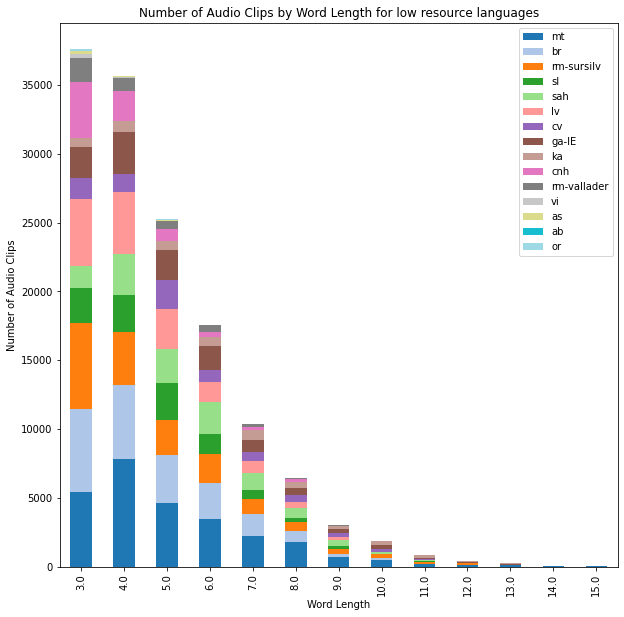

In [30]:
language_fractions_df.transpose()[wl15].transpose()[low].plot(use_index=True,kind='bar',stacked=True, figsize=(10,10), ylabel="Number of Audio Clips", xlabel='Word Length', title='Number of Audio Clips by Word Length for low resource languages', colormap='tab20')

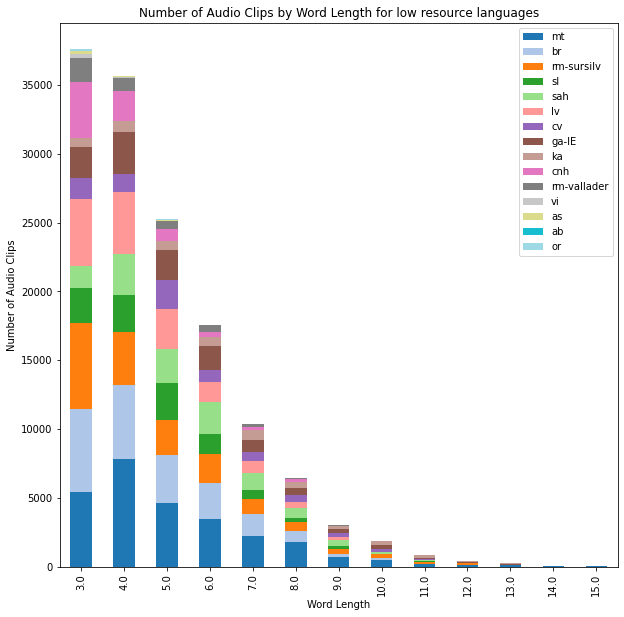

In [31]:
language_fractions_df.transpose()[wl15].transpose()[low].plot(use_index=True,kind='bar',stacked=True, figsize=(10,10), ylabel="Number of Audio Clips", xlabel='Word Length', title='Number of Audio Clips by Word Length for low resource languages', colormap='tab20')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_low_resource.png')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_low_resource.pdf')

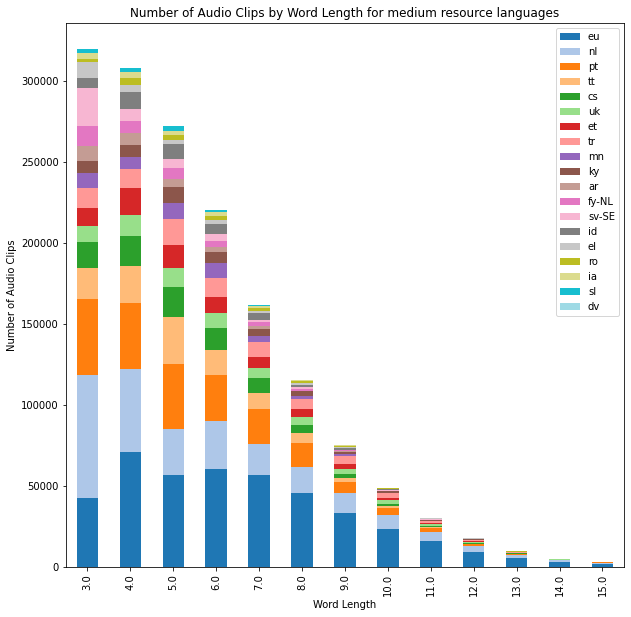

In [32]:
language_fractions_df.transpose()[wl15].transpose()[medium].plot(use_index=True,kind='bar',stacked=True, figsize=(10,10), ylabel="Number of Audio Clips", xlabel='Word Length', title='Number of Audio Clips by Word Length for medium resource languages', colormap='tab20')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_medium_resource.png')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_medium_resource.pdf')

['de', 'fr', 'ca', 'es', 'ru', 'it', 'pl', 'fa', 'eo', 'cy', 'ta', 'en', 'rw']


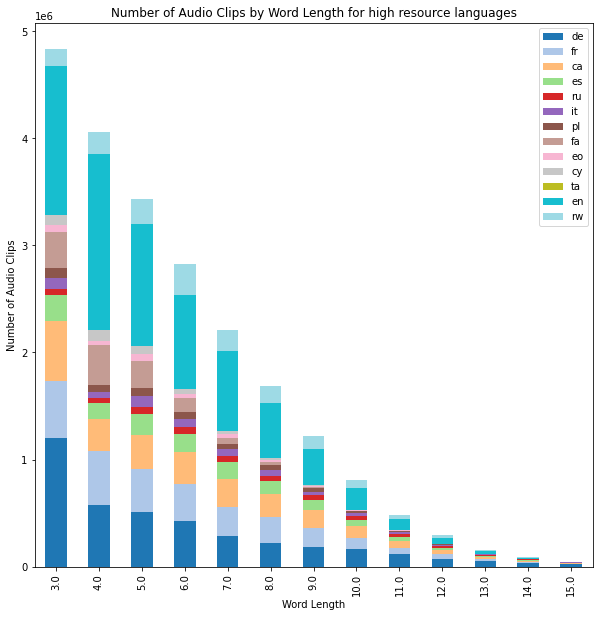

In [33]:
high.extend(["en","rw"])
print(high)
language_fractions_df.transpose()[wl15].transpose()[high].plot(use_index=True,kind='bar',stacked=True, figsize=(10,10), ylabel="Number of Audio Clips", xlabel='Word Length', title='Number of Audio Clips by Word Length for high resource languages', colormap='tab20')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_high_resource.png')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_high_resource.pdf')

In [34]:
high.sort()

In [35]:
high

['ca', 'cy', 'de', 'en', 'eo', 'es', 'fa', 'fr', 'it', 'pl', 'ru', 'rw', 'ta']

In [36]:
high = ["de","en","fr","ca",'rw','es',"ru","it","po","fa","eo","cy","ta"]

In [37]:
language_fractions_df.transpose()[wl15].transpose()[high].plot(use_index=True,kind='bar',stacked=True, figsize=(10,10), ylabel="Number of Audio Clips", xlabel='Word Length', title='Number of Audio Clips by Word Length for high resource languages', colormap='tab20')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_high_resource.png')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_high_resource.pdf')

KeyError: "['po'] not in index"

In [38]:
high = ["de","en","fr","ca",'rw','es',"ru","it","pl","fa","eo","cy","ta"]

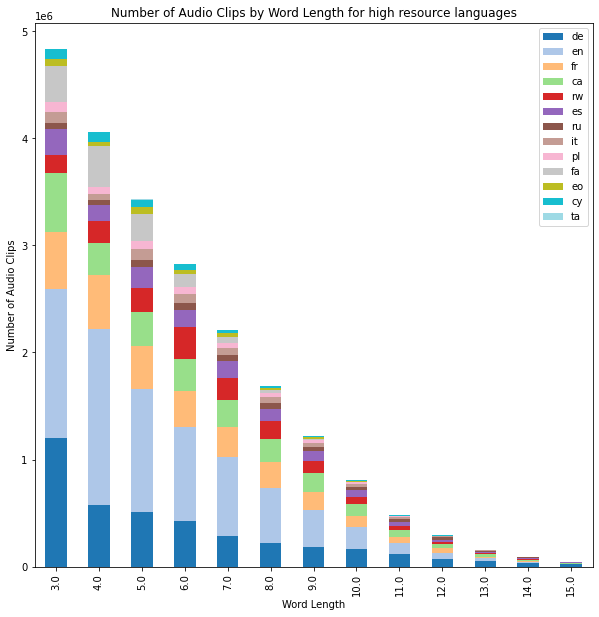

In [39]:
language_fractions_df.transpose()[wl15].transpose()[high].plot(use_index=True,kind='bar',stacked=True, figsize=(10,10), ylabel="Number of Audio Clips", xlabel='Word Length', title='Number of Audio Clips by Word Length for high resource languages', colormap='tab20')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_high_resource.png')
plt.savefig('plots/stacked/audio_clips_by_word_length_vs_word_length_high_resource.pdf')

In [40]:
main_data

,index,word,counts,language,wl
0,0,che,9624,it,3.0
1,1,per,8938,it,3.0
2,2,del,8419,it,3.0
3,3,non,7403,it,3.0
4,4,della,7323,it,5.0
...,...,...,...,...,...
354102,15901,нептунием,5,ru,9.0
354103,15902,поддерживается,5,ru,14.0
354104,15903,барнаулом,5,ru,9.0
354105,15904,березы,5,ru,6.0


<AxesSubplot:xlabel='language', ylabel='wl'>

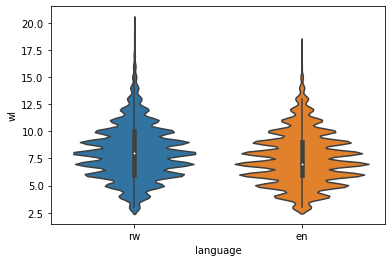

In [41]:
sns.violinplot(x="language",y="wl",data=main_data.loc[main_data['language'].isin(higher),:])

<AxesSubplot:xlabel='language', ylabel='wl'>

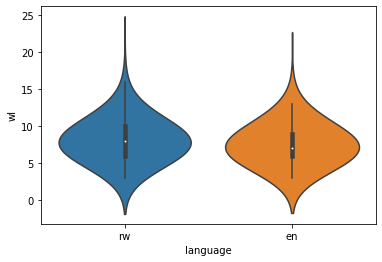

In [42]:
sns.violinplot(x="language",y="wl",data=main_data.loc[main_data['language'].isin(higher),:],bw=1)

<AxesSubplot:xlabel='language', ylabel='wl'>

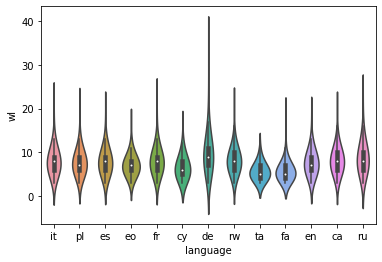

In [43]:
sns.violinplot(x="language",y="wl",data=main_data.loc[main_data['language'].isin(high),:],bw=1)

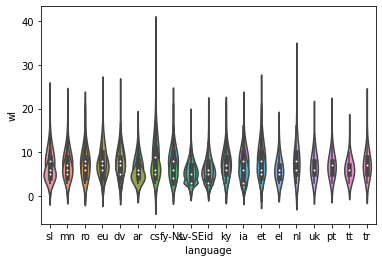

In [44]:
sns.violinplot(x="language",y="wl",data=main_data.loc[main_data['language'].isin(high),:],bw=1)
plt.savefig('plots/violin/isocode_high_resource.pdf')
plt.savefig('plots/violin/isocode_high_resource.png')
sns.violinplot(x="language",y="wl",data=main_data.loc[main_data['language'].isin(low),:],bw=1)
plt.savefig('plots/violin/isocode_low_resource.pdf')
plt.savefig('plots/violin/isocode_low_resource.png')
sns.violinplot(x="language",y="wl",data=main_data.loc[main_data['language'].isin(medium),:],bw=1)
plt.savefig('plots/violin/isocode_medium_resource.pdf')
plt.savefig('plots/violin/isocode_medium_resource.png')

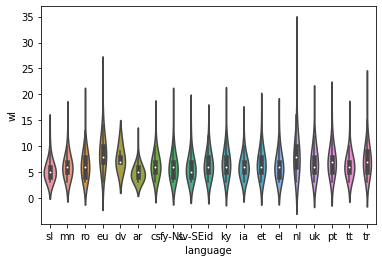

In [45]:
sns.violinplot(x="language",y="wl",data=main_data.loc[main_data['language'].isin(medium),:],bw=1)
plt.savefig('plots/violin/isocode_medium_resource.pdf')
plt.savefig('plots/violin/isocode_medium_resource.png')

In [46]:
iso_code_to_name

{'ab': 'Abkhaz',
 'ar': 'Arabic',
 'as': 'Assamese',
 'br': 'Breton',
 'cnh': 'Hakha Chin',
 'ca': 'Catalan',
 'cs': 'Czech',
 'cv': 'Chuvash',
 'cy': 'Welsh',
 'de': 'German',
 'dv': 'Divehi',
 'el': 'Greek',
 'en': 'English',
 'es': 'Spanish',
 'eo': 'Esperanto',
 'eu': 'Basque',
 'et': 'Estonian',
 'fa': 'Persian',
 'fr': 'French',
 'fy-NL': 'Frisian',
 'ga-IE': 'Irish',
 'ia': 'Interlingua',
 'id': 'Indonesian',
 'it': 'Italian',
 'ja': 'Japanese',
 'ka': 'Georgian',
 'ky': 'Kyrgyz',
 'lv': 'Latvian',
 'mn': 'Mongolian',
 'mt': 'Maltese',
 'nl': 'Dutch',
 'or': 'Oriya',
 'pa-IN': 'Punjabi',
 'pl': 'Polish',
 'pt': 'Portuguese',
 'rm-sursilv': 'Sursilvan',
 'rm-vallader': 'Vallader',
 'ro': 'Romanian',
 'ru': 'Russian',
 'rw': 'Kinyarwanda',
 'sah': 'Sakha',
 'sl': 'Slovenian',
 'sv-SE': 'Swedish',
 'ta': 'Tamil',
 'tr': 'Turkish',
 'tt': 'Tatar',
 'uk': 'Ukrainian',
 'vi': 'Vietnamese',
 'zh-CN': 'Chinese'}

In [47]:
main_data_lang = main_data.replace({'language':iso_code_to_name})

In [48]:
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(medium),:],bw=1)
plt.savefig('plots/violin/isocode_medium_resource.pdf')
plt.savefig('plots/violin/isocode_medium_resource.png')

ValueError: min() arg is an empty sequence

In [49]:
main_data_lang

,index,word,counts,language,wl
0,0,che,9624,Italian,3.0
1,1,per,8938,Italian,3.0
2,2,del,8419,Italian,3.0
3,3,non,7403,Italian,3.0
4,4,della,7323,Italian,5.0
...,...,...,...,...,...
354102,15901,нептунием,5,Russian,9.0
354103,15902,поддерживается,5,Russian,14.0
354104,15903,барнаулом,5,Russian,9.0
354105,15904,березы,5,Russian,6.0


In [50]:
medium

['eu',
 'nl',
 'pt',
 'tt',
 'cs',
 'uk',
 'et',
 'tr',
 'mn',
 'ky',
 'ar',
 'fy-NL',
 'sv-SE',
 'id',
 'el',
 'ro',
 'ia',
 'sl',
 'dv']

In [51]:
medium_lang = [iso_code_to_name[i] for i in medium]
medium_lang

['Basque',
 'Dutch',
 'Portuguese',
 'Tatar',
 'Czech',
 'Ukrainian',
 'Estonian',
 'Turkish',
 'Mongolian',
 'Kyrgyz',
 'Arabic',
 'Frisian',
 'Swedish',
 'Indonesian',
 'Greek',
 'Romanian',
 'Interlingua',
 'Slovenian',
 'Divehi']

In [52]:
high_lang = [iso_code_to_name[i] for i in high]
high_lang

['German',
 'English',
 'French',
 'Catalan',
 'Kinyarwanda',
 'Spanish',
 'Russian',
 'Italian',
 'Polish',
 'Persian',
 'Esperanto',
 'Welsh',
 'Tamil']

In [53]:
low_lang = [iso_code_to_name[i] for i in low]
low_lang

['Maltese',
 'Breton',
 'Sursilvan',
 'Slovenian',
 'Sakha',
 'Latvian',
 'Chuvash',
 'Irish',
 'Georgian',
 'Hakha Chin',
 'Vallader',
 'Vietnamese',
 'Assamese',
 'Abkhaz',
 'Oriya']

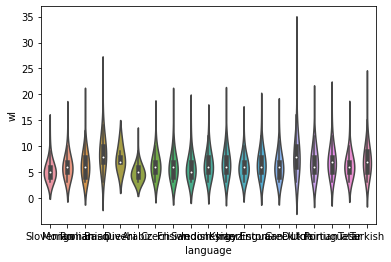

In [54]:
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(medium_lang),:],bw=1)
plt.savefig('plots/violin/medium_resource.pdf')
plt.savefig('plots/violin/medium_resource.png')

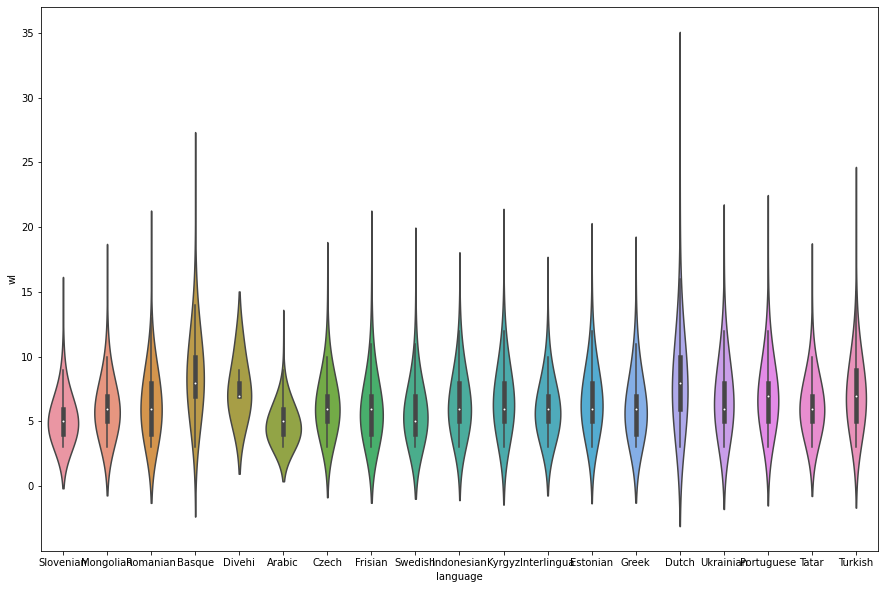

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(medium_lang),:],bw=1, ax=ax)
plt.savefig('plots/violin/medium_resource.pdf')
plt.savefig('plots/violin/medium_resource.png')

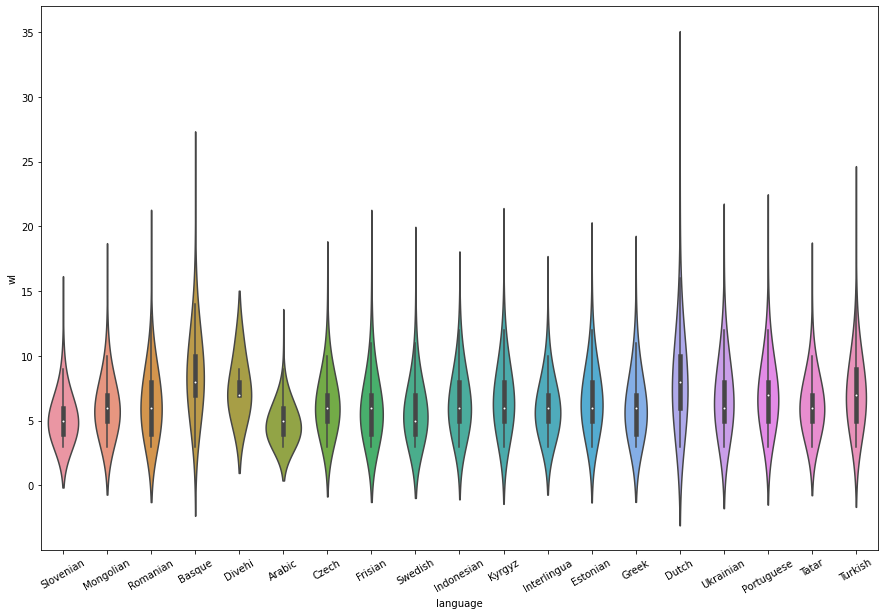

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(medium_lang),:],bw=1, ax=ax)
ax.tick_params(axis='x', rotation=30)
# plt.savefig('plots/violin/medium_resource.pdf')
# plt.savefig('plots/violin/medium_resource.png')

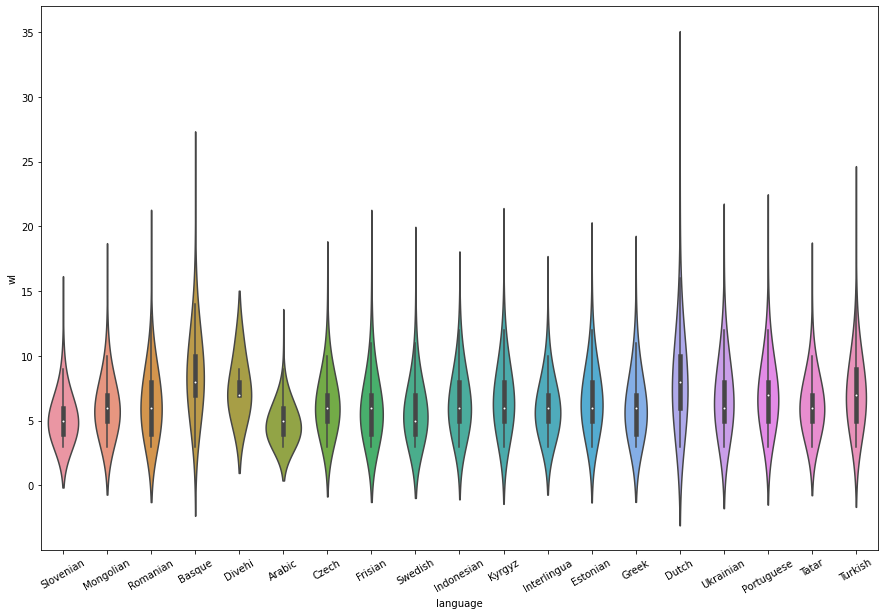

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(medium_lang),:],bw=1, ax=ax)
ax.tick_params(axis='x', rotation=30)
plt.savefig('plots/violin/medium_resource.pdf')
plt.savefig('plots/violin/medium_resource.png')

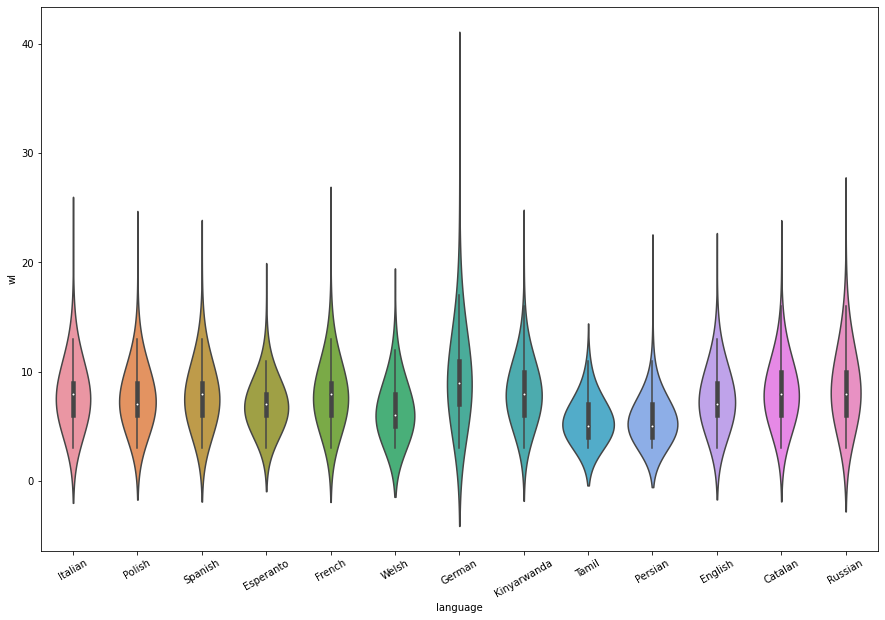

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(high_lang),:],bw=1, ax=ax)
ax.tick_params(axis='x', rotation=30)
plt.savefig('plots/violin/high_resource.pdf')
plt.savefig('plots/violin/high_resource.png')

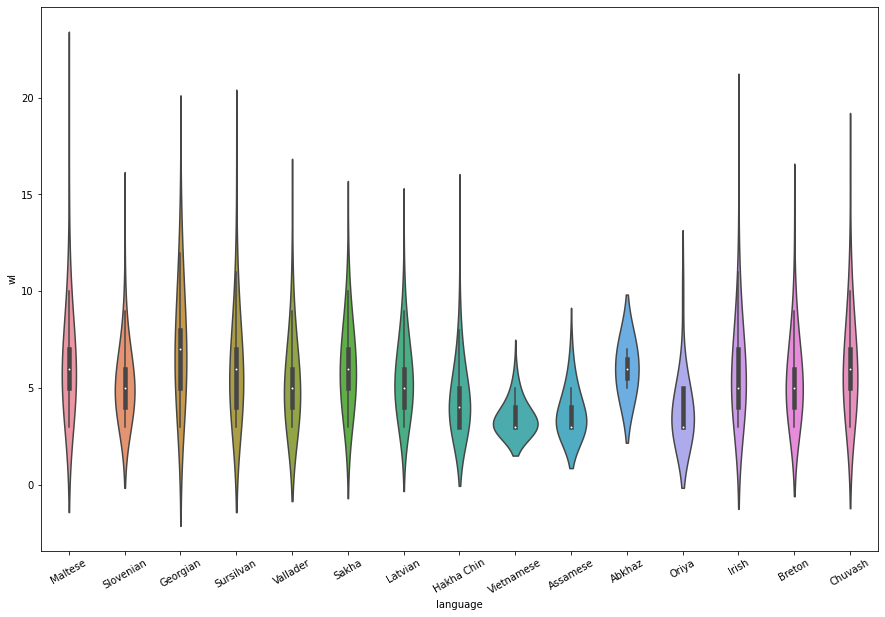

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(low_lang),:],bw=1, ax=ax)
ax.tick_params(axis='x', rotation=30)
plt.savefig('plots/violin/low_resource.pdf')
plt.savefig('plots/violin/low_resource.png')